In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data=pd.read_csv('/content/drive/MyDrive/week2_python_task/train.csv')

In [4]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [5]:
data.shape

(29451, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [7]:
data.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [ ]:
# data["SQUARE_FT"] = data["SQUARE_FT"].fillna(data["SQUARE_FT"].mean())  #using mean replace null values
# data["SQUARE_FT"] = data["SQUARE_FT"].fillna(data["SQUARE_FT"].median())  #using median replace null values
# data["SQUARE_FT"] = data["SQUARE_FT"].fillna(data["SQUARE_FT"].std())  #using std replace null values
# data["SQUARE_FT"] = data["SQUARE_FT"].fillna(data["SQUARE_FT"].mean())  #droping coulumns with null values

Text(195.72222222222223, 0.5, 'Data Index')

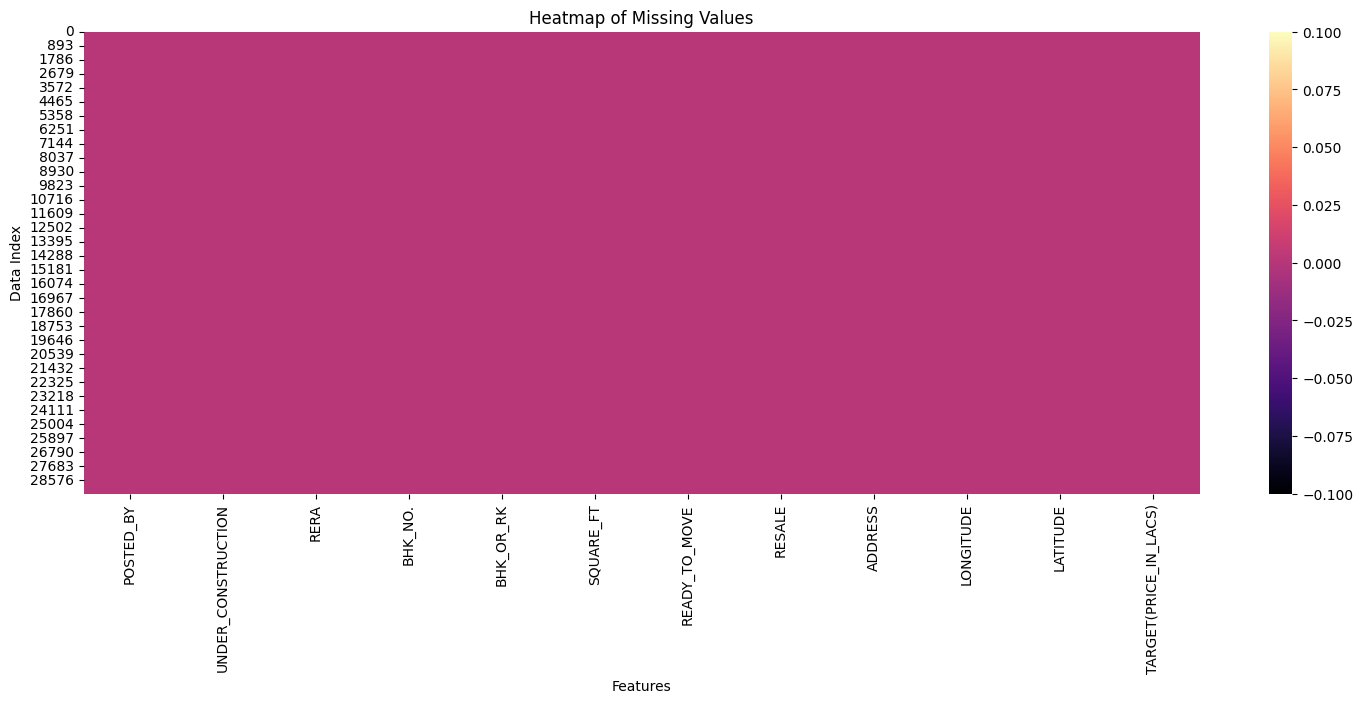

In [8]:
plt.figure(figsize=(18, 6))
sns.heatmap(data.isnull(), cmap='magma')

plt.title('Heatmap of Missing Values')
plt.xlabel('Features')
plt.ylabel('Data Index')

In [9]:
data.duplicated().sum()

401

In [10]:
data = data.drop_duplicates()

In [11]:
data.shape

(29050, 12)

In [12]:
data.nunique()

POSTED_BY                    3
UNDER_CONSTRUCTION           2
RERA                         2
BHK_NO.                     16
BHK_OR_RK                    2
SQUARE_FT                19561
READY_TO_MOVE                2
RESALE                       2
ADDRESS                   6899
LONGITUDE                 4087
LATITUDE                  4078
TARGET(PRICE_IN_LACS)     1172
dtype: int64

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UNDER_CONSTRUCTION,29050.0,0.178967,3.833315e-01,0.000000,0.000000,0.000000,0.000000,1.000000e+00
RERA,29050.0,0.315869,4.648691e-01,0.000000,0.000000,0.000000,1.000000,1.000000e+00
BHK_NO.,29050.0,2.390809,8.806765e-01,1.000000,2.000000,2.000000,3.000000,2.000000e+01
SQUARE_FT,29050.0,20031.714046,1.914411e+06,3.000000,900.000000,1172.741625,1550.169109,2.545455e+08
READY_TO_MOVE,29050.0,0.821033,3.833315e-01,0.000000,1.000000,1.000000,1.000000,1.000000e+00
RESALE,29050.0,0.930361,2.545413e-01,0.000000,1.000000,1.000000,1.000000,1.000000e+00
LONGITUDE,29050.0,21.270272,6.195973e+00,-37.713008,18.452663,20.631532,26.886881,5.991288e+01
LATITUDE,29050.0,76.829585,1.056757e+01,-121.761248,73.794800,77.322873,77.912934,1.529627e+02
TARGET(PRICE_IN_LACS),29050.0,141.712677,6.500558e+02,0.250000,38.000000,61.750000,100.000000,3.000000e+04


In [14]:
data = data.drop(['POSTED_BY','BHK_OR_RK','ADDRESS'], axis = 1)
data

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...
29446,0,0,3,2500.000000,1,1,27.140626,78.043277,45.0
29447,0,0,2,769.230769,1,1,39.945409,-86.150721,16.0
29448,0,0,2,1022.641509,1,1,26.928785,75.828002,27.1
29449,0,0,2,927.079009,1,1,12.900150,80.227910,67.0


In [15]:
data.columns

Index(['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE',
       'RESALE', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [16]:
data.shape

(29050, 9)

In [17]:
# data = data.fillna(data.mean())
# data = data.fillna(data.median())
# data = data.fillna(data.std())
# data = data.drop()

In [ ]:
sns.pairplot(data)
plt.show()

In [19]:
fig = px.density_mapbox(data,  lon = 'LATITUDE',lat = 'LONGITUDE',radius = 8,zoom = 6,mapbox_style = 'open-street-map')
fig.show()

The map represents most of the houses are from india


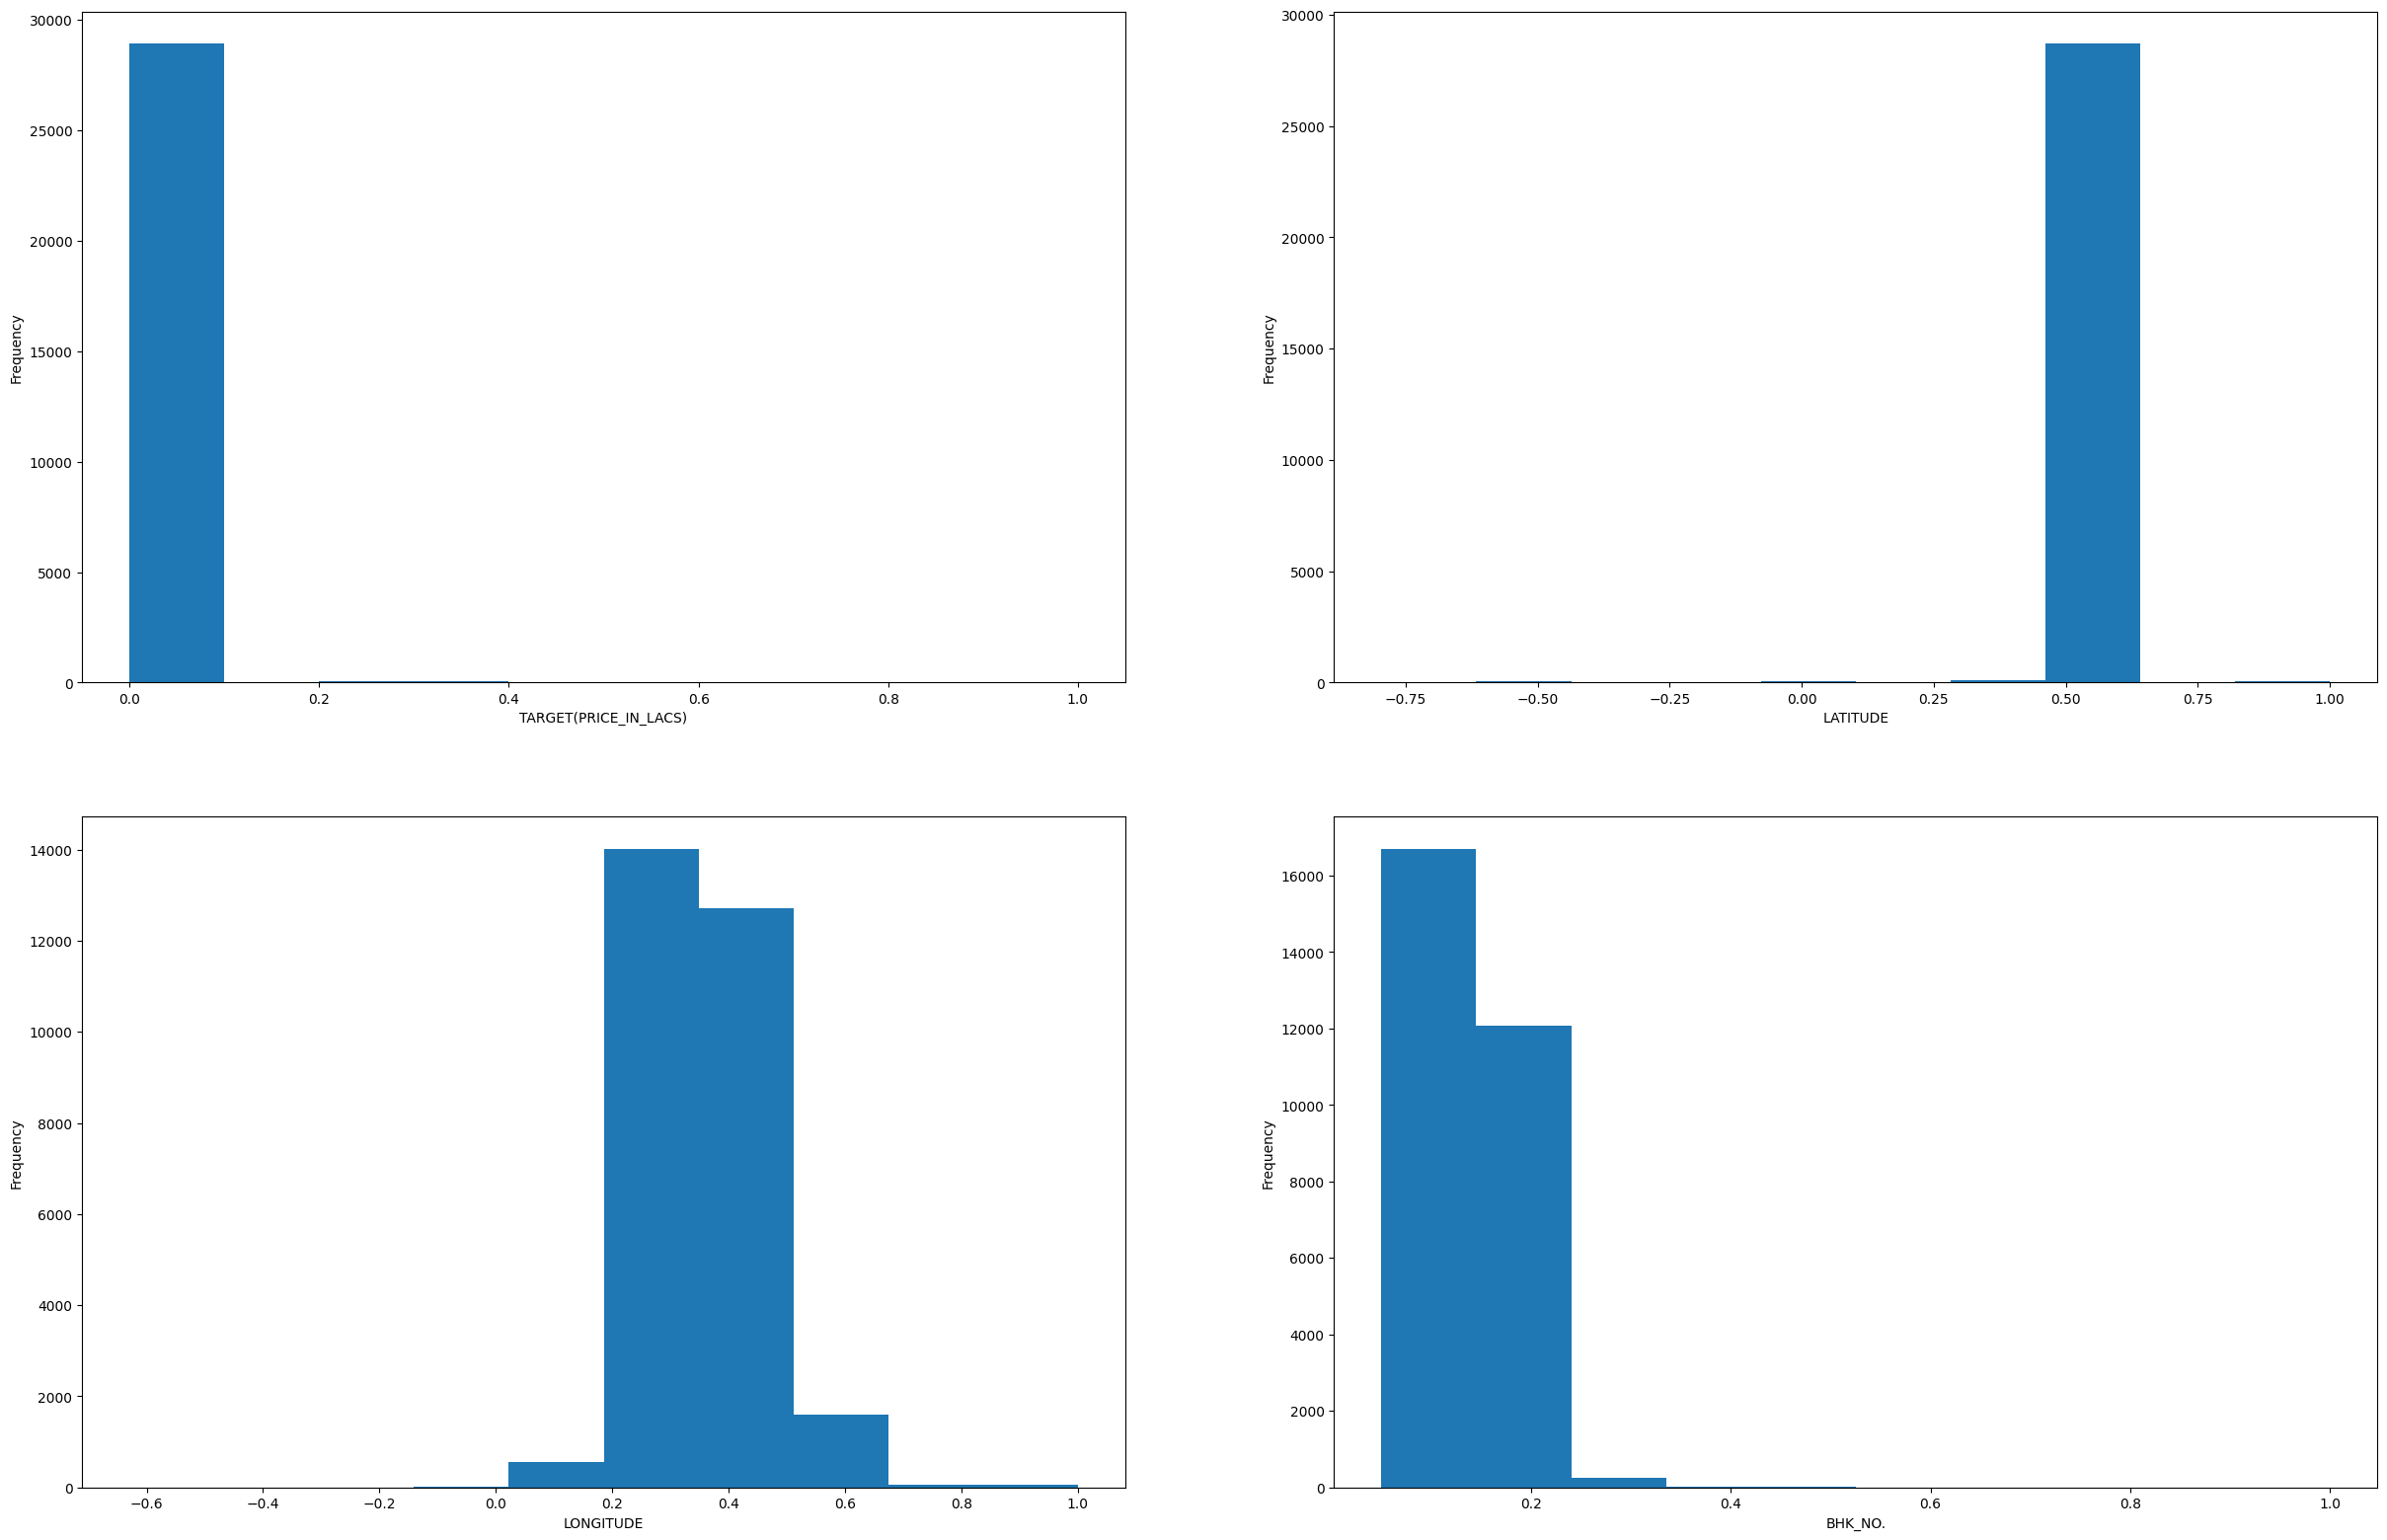

In [20]:
i = 1
plt.figure(figsize=(30,30))
for col in ['TARGET(PRICE_IN_LACS)','LATITUDE','LONGITUDE','BHK_NO.']:
    plt.subplot(3,2,i)
    i = i + 1
    ax = (data[col]/data[col].max()).plot.hist()
    ax.set_xlabel(col)

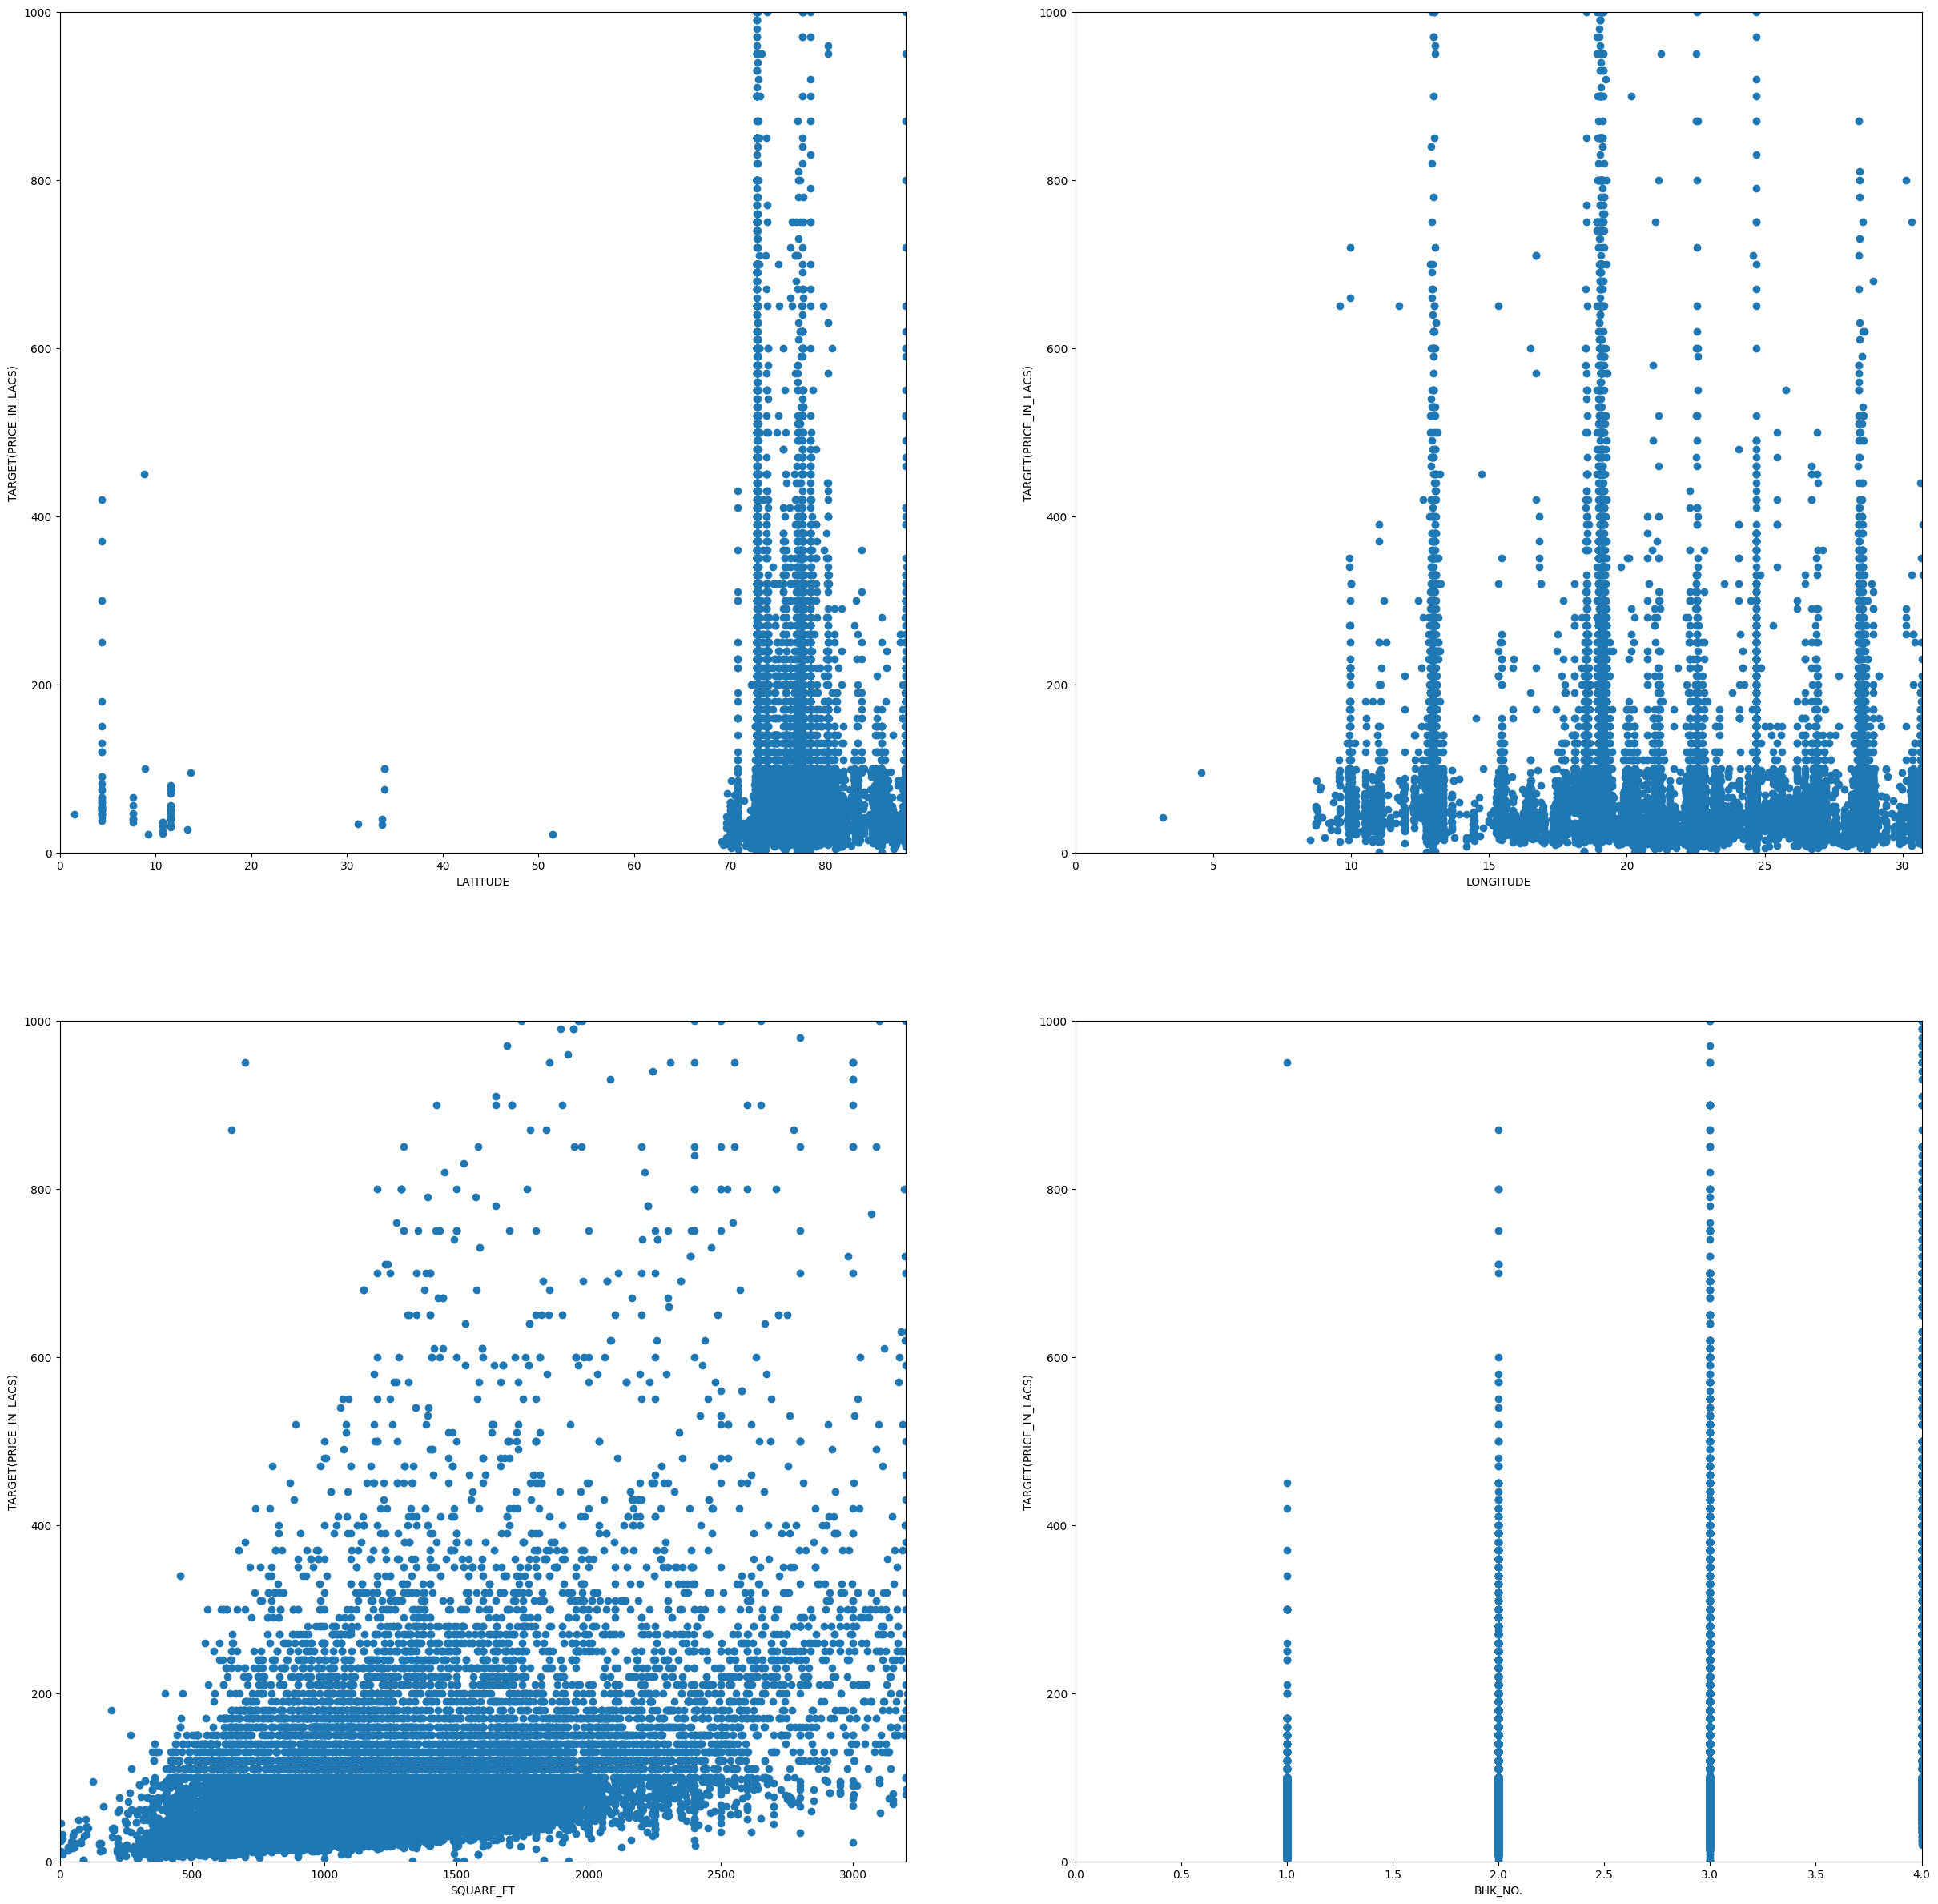

In [21]:
i = 1
plt.figure(figsize=(30,30))
for col in ['LATITUDE','LONGITUDE','SQUARE_FT','BHK_NO.']:
        plt.subplot(2,2,i)
        i = i + 1
        plt.scatter(data[col],data['TARGET(PRICE_IN_LACS)'])
        plt.ylabel('TARGET(PRICE_IN_LACS)')
        plt.ylim([0,1000])
        plt.xlim([0,data[col].quantile(0.97)])
        plt.xlabel(col)

<Axes: >

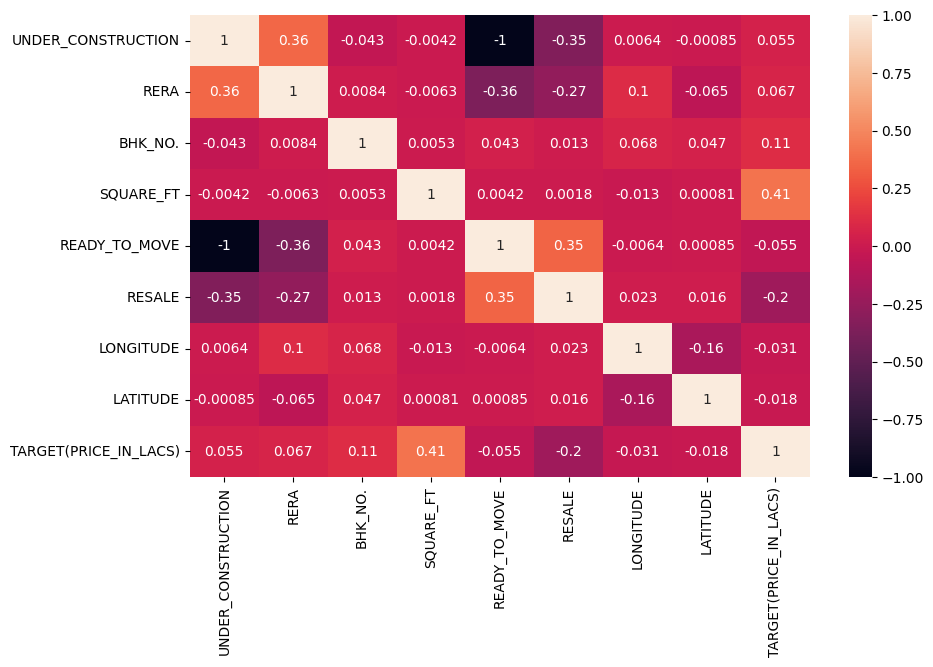

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True)

Price of the house depends on ,

1) RERA
2) BHK_NO.
3) SQUARE_FT

In [23]:
x = data.drop("TARGET(PRICE_IN_LACS)", axis=1)
y = pd.DataFrame(data["TARGET(PRICE_IN_LACS)"])

In [24]:
y = np.array(y).ravel()
# Create a RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(x, y)

# Get importances features
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
print(feature_importance_df)

              Feature  Importance
3           SQUARE_FT    0.877838
5              RESALE    0.061964
7            LATITUDE    0.028218
6           LONGITUDE    0.021097
2             BHK_NO.    0.008665
1                RERA    0.001350
0  UNDER_CONSTRUCTION    0.000463
4       READY_TO_MOVE    0.000404


In [25]:
x = data.drop(['UNDER_CONSTRUCTION','READY_TO_MOVE'], axis=1)

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.20,random_state = 42)

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

y_train = sc.fit_transform(Y_train.reshape(-1, 1))
y_test = sc.fit_transform(Y_test.reshape(-1, 1))

In [28]:
Y_train

array([ 36. ,  96. ,  23.8, ..., 110. ,  22. ,  82. ])

In [29]:
class RidgeRegression:
    def __init__(self, learning_rate=0.01, iterations=1000, lambda_param=1):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.lambda_param = lambda_param
        self.weights = 0
        self.bias = 0

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        for _ in range(self.iterations):
            # Predictions
            y_pred = np.dot(X, self.weights) + self.bias

            # Calculate gradients
            dw = (2 / n_samples) * (np.dot(X.T, (y_pred - y)) + self.lambda_param * self.weights)
            db = (2 / n_samples) * np.sum(y_pred - y) + 2 * self.lambda_param * self.bias

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

ridge_model = RidgeRegression(learning_rate=0.01, iterations=1000, lambda_param=1)
ridge_model.fit(X_train, y_train)

# Make predictions
predictions = ridge_model.predict(X_test)

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import math

# Assuming `predictions` are your model's predicted values and `y_test` are the actual values

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test,predictions)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean absolute percentage Error (MSPE): {mape}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error (MAE): 1.2905405546932795e-05
Mean Squared Error (MSE): 2.384726993512421e-09
Mean absolute percentage Error (MSPE): 0.00015286394293989608
Root Mean Squared Error (RMSE): 4.883366659910375e-05
R-squared: 0.999999997615273


In [31]:
from sklearn.linear_model import Ridge

In [32]:
reg = Ridge(alpha=1)
reg.fit(X_train, y_train)

Ridge(alpha=1)

In [33]:
pred = reg.predict(X_test)

In [34]:
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
mape = mean_absolute_percentage_error(y_test,pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean absolute percentage Error (MSPE): {mape}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error (MAE): 1.0926295998656892e-05
Mean Squared Error (MSE): 1.9564817196168587e-09
Mean absolute percentage Error (MSPE): 0.00012039974108123874
Root Mean Squared Error (RMSE): 4.423213446824445e-05
R-squared: 0.9999999980435182


---------------------------------------Summary---------------------------------

Data set Name - House Price Prediction

Data set size - 29050

Data set Shape - (29050, 9)

1) Data Cleaning

-> Droping Duplicates  

-> Checking Null Values

-> Filling null values using mode, mean, median, std

2) Data Visualization

Price of the house depends on ,

1) RERA

2) BHK_NO.

3) SQUARE_FT

4) Under Construction

****The map represents most of the houses are from india


 3) Model Building
  
  Model - Ridge Regression

 4) Model BenchMerking
  
  Our model:

Mean Absolute Error (MAE): 1.2905405546932795e-05

Mean Squared Error (MSE): 2.384726993512421e-09

Mean absolute percentage Error (MSPE): 0.00015286394293989608

Root Mean Squared Error (RMSE): 4.883366659910375e-05

R-squared: 0.999999997615273
  For Sklearn model:
  
Mean Absolute Error (MAE): 1.0926295998656892e-05

Mean Squared Error (MSE): 1.9564817196168587e-09

Mean absolute percentage Error (MSPE): 0.00012039974108123874

Root Mean Squared Error (RMSE): 4.423213446824445e-05

R-squared: 0.9999999980435182
